In [1]:
!pip install basemap basemap-data-hires

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('datadata.csv')

# Initial data

In [4]:
initial_df = data[data['is_augmented'] == False]

In [5]:
augmented_df = data[data['is_augmented'] == True]

In [6]:
num_unique_countries = initial_df['country'].nunique()
print(f"Number of unique countries: {num_unique_countries}")

Number of unique countries: 126


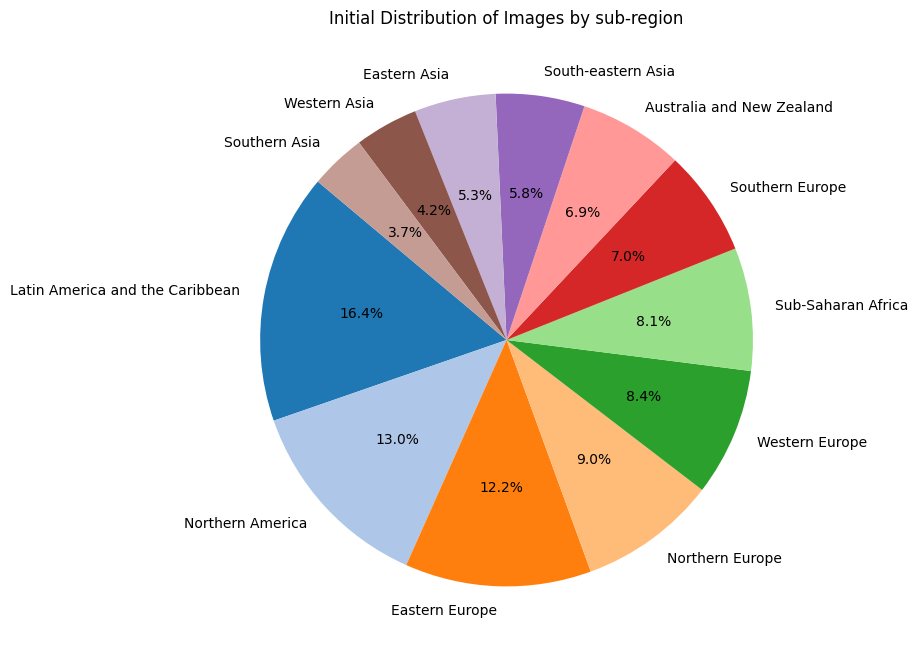

In [7]:
# Distribution of data based on sub-region
sub_region_distribution = initial_df['sub-region'].value_counts()


plt.figure(figsize=(12, 8))
plt.pie(
    sub_region_distribution,
    labels=sub_region_distribution.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab20.colors
)
plt.title('Initial Distribution of Images by sub-region')
plt.show()

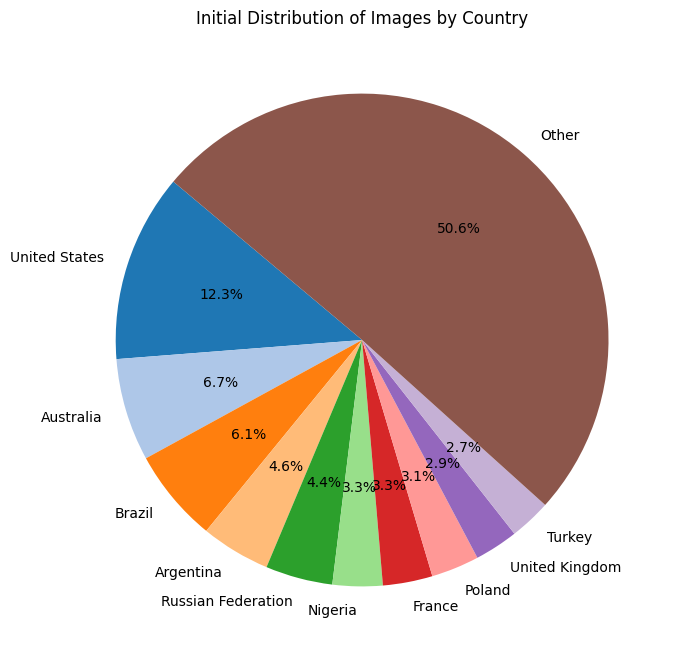

In [8]:
# Distribution of data based on country
country_distribution = initial_df['country'].value_counts()

top_10_countries = country_distribution[:10]
others = country_distribution[10:].sum()
top_10_countries['Other'] = others

plt.figure(figsize=(12, 8))
plt.pie(
    top_10_countries,
    labels=top_10_countries.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab20.colors
)
plt.title('Initial Distribution of Images by Country')
plt.show()

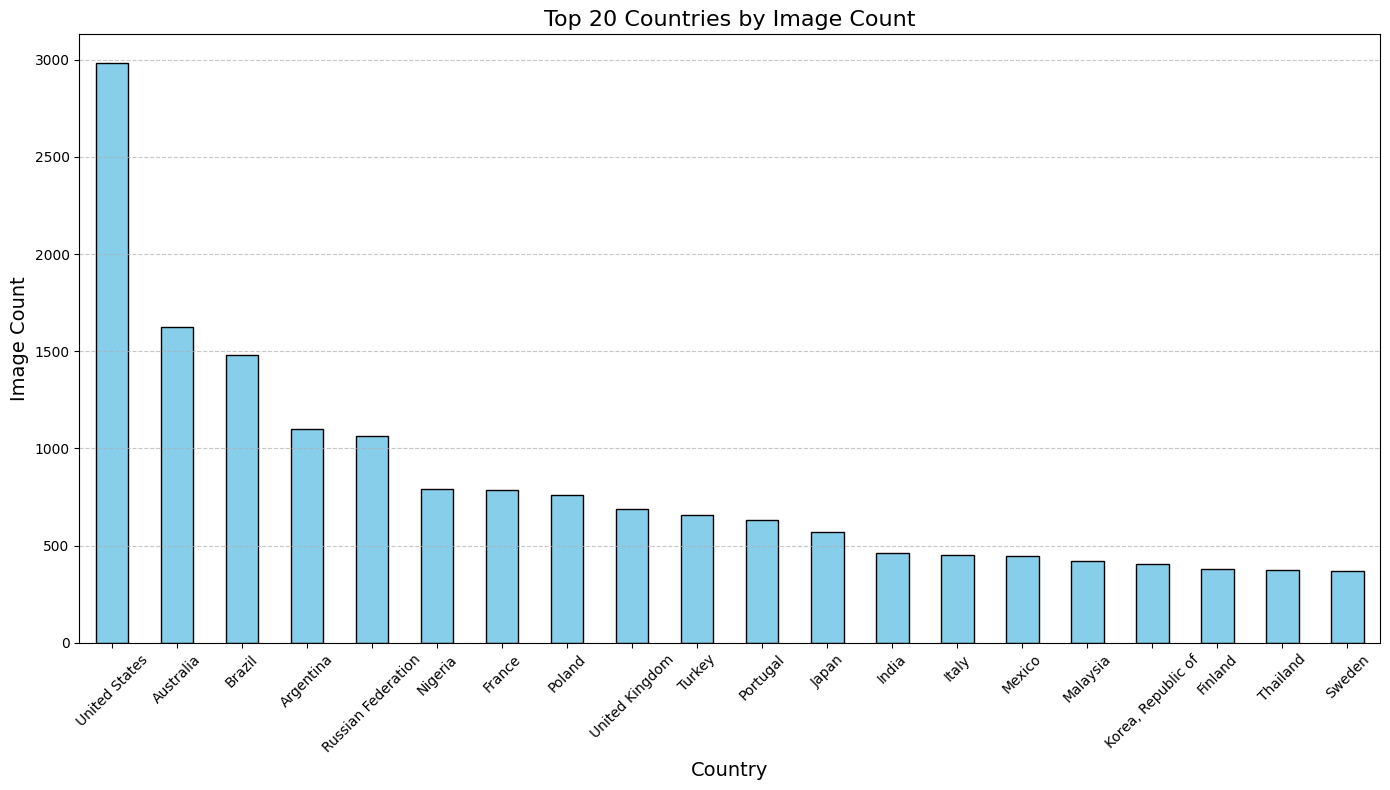

In [9]:
# Distribution of data based on country
country_distribution = initial_df['country'].value_counts()

# Get the top 20 countries
top_20_countries = country_distribution[:20]

# Plot the bar chart
plt.figure(figsize=(14, 8))
top_20_countries.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Top 20 Countries by Image Count', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Image Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


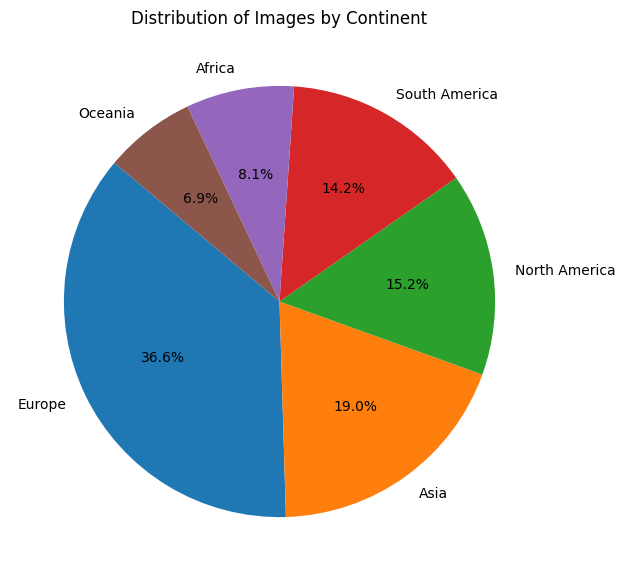

In [10]:
# Distribution of data based on continent
continent_distribution = initial_df['continent'].value_counts()

plt.figure(figsize=(10, 7))
plt.pie(continent_distribution, labels=continent_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Images by Continent')
plt.show()


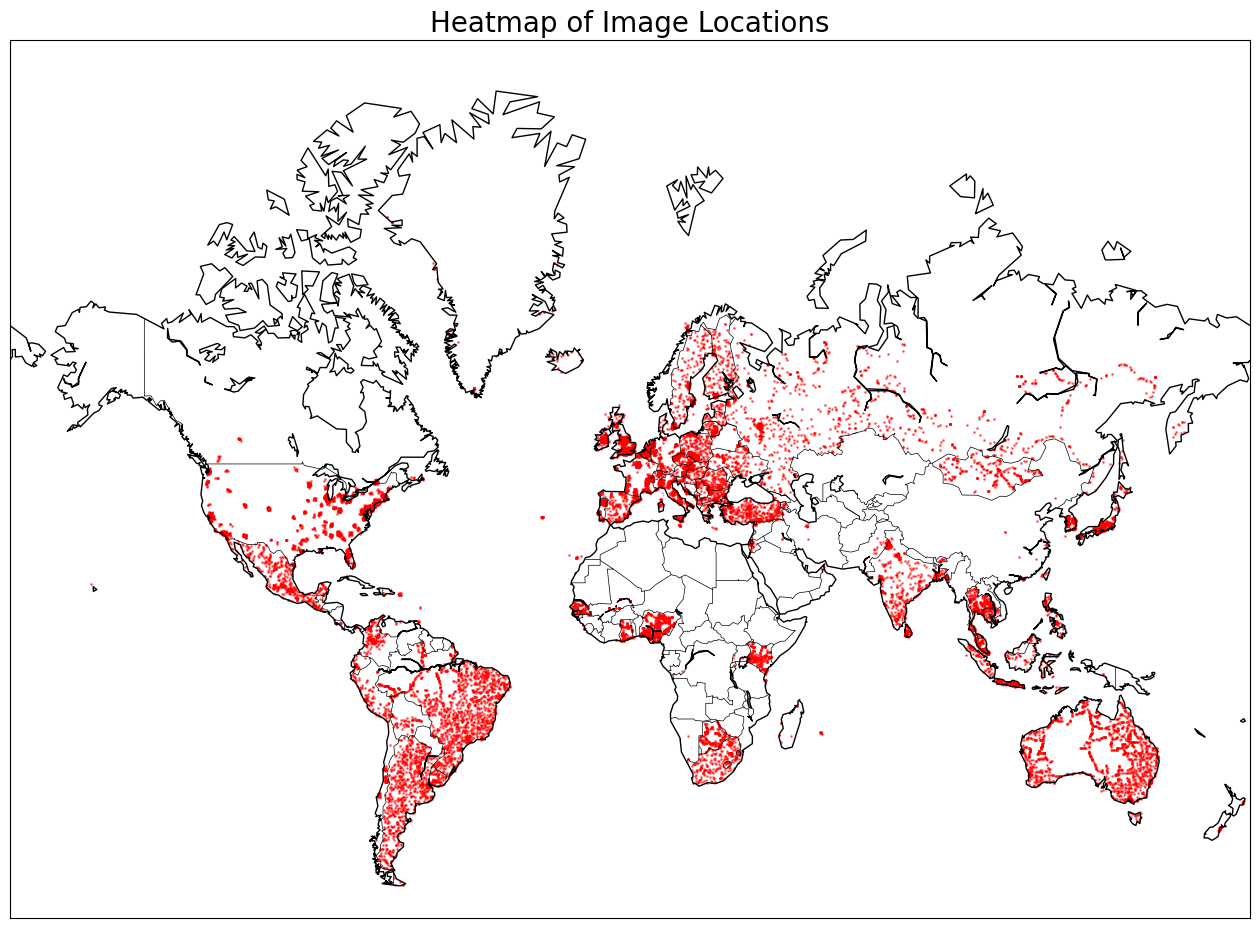

In [11]:
from mpl_toolkits.basemap import Basemap

# Create a figure for the heatmap
plt.figure(figsize=(16, 12))

# Create a Basemap instance
m = Basemap(projection='merc', llcrnrlat=-60, urcrnrlat=85, llcrnrlon=-180, urcrnrlon=180, resolution='c')

# Draw coastlines and country borders
m.drawcoastlines()
m.drawcountries()

# Convert latitude and longitude to map coordinates
x, y = m(initial_df['longitude'].values, initial_df['latitude'].values)

# Plot the heatmap using a scatter plot
m.scatter(x, y, c='red', alpha=0.5, s=1, marker='o')

# Add title
plt.title('Heatmap of Image Locations', fontsize=20)

# Show the heatmap
plt.show()


# Augmented

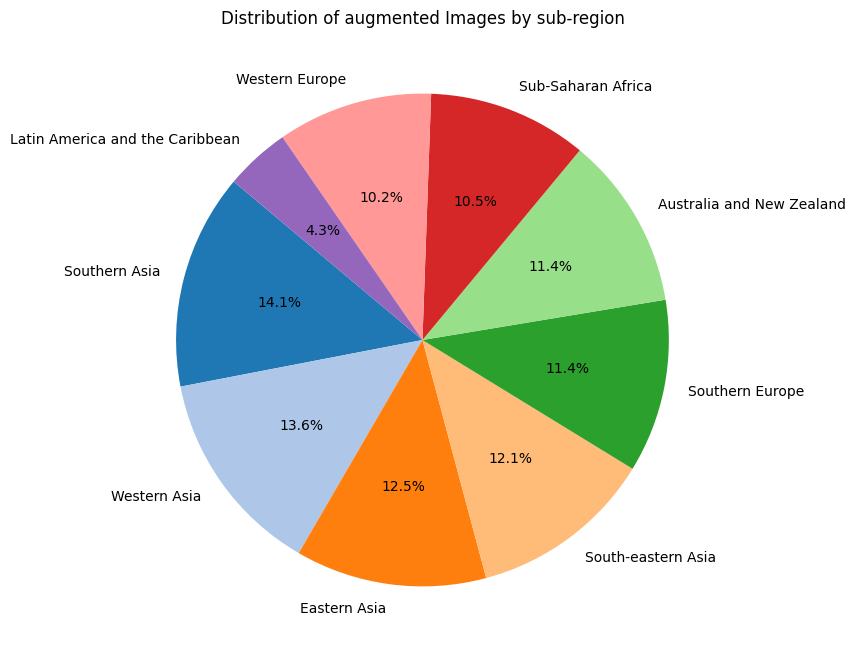

In [12]:
# Distribution of data based on sub-region
sub_region_distribution = augmented_df['sub-region'].value_counts()


plt.figure(figsize=(12, 8))
plt.pie(
    sub_region_distribution,
    labels=sub_region_distribution.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab20.colors
)
plt.title('Distribution of augmented Images by sub-region')
plt.show()

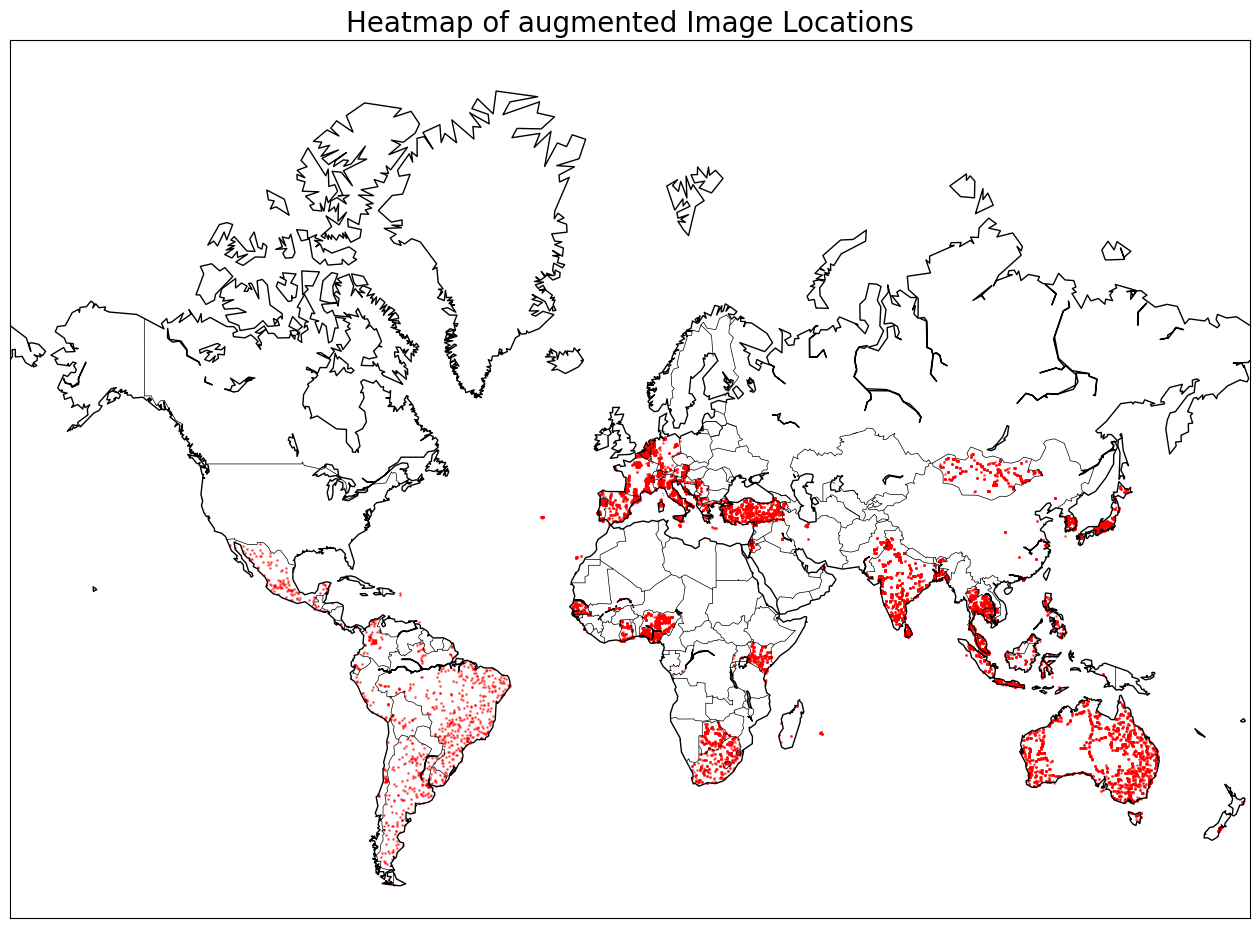

In [13]:
from mpl_toolkits.basemap import Basemap
import seaborn as sns

# Create a figure for the heatmap
plt.figure(figsize=(16, 12))

# Create a Basemap instance
m = Basemap(projection='merc', llcrnrlat=-60, urcrnrlat=85, llcrnrlon=-180, urcrnrlon=180, resolution='c')

# Draw coastlines and country borders
m.drawcoastlines()
m.drawcountries()

# Convert latitude and longitude to map coordinates
x, y = m(augmented_df['longitude'].values, augmented_df['latitude'].values)

# Plot the heatmap using a scatter plot
m.scatter(x, y, c='red', alpha=0.5, s=1, marker='o')

# Add title
plt.title('Heatmap of augmented Image Locations', fontsize=20)

# Show the heatmap
plt.show()


# Initial with augmented

In [14]:
data

,Unnamed: 0,latitude,longitude,image_name,country_code,country,continent,region,alpha-2,sub-region,is_augmented,aumentation_source_image_name,is_test
0,0,45.603220,15.538784,3388.png,HR,Croatia,Europe,Croatia,HR,Southern Europe,False,3388.png,False
1,1,7.382881,3.673380,2963.png,NG,Nigeria,Africa,Nigeria,NG,Sub-Saharan Africa,False,2963.png,False
2,2,1.400360,103.894100,14138.png,MY,Malaysia,Asia,Malaysia,MY,South-eastern Asia,False,14138.png,False
3,3,53.949390,-7.846810,23442.png,IE,Ireland,Europe,Ireland,IE,Northern Europe,False,23442.png,False
4,4,32.186400,34.864500,20450.png,IL,Israel,Asia,Israel,IL,Western Asia,False,20450.png,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47400,5024,40.931210,-73.898750,17213.png,US,United States,North America,United States,US,Northern America,False,17213.png,True
47401,5025,14.007820,99.728530,22755.png,TH,Thailand,Asia,Thailand,TH,South-eastern Asia,False,22755.png,True
47402,5026,60.566390,27.717616,8416.png,FI,Finland,Europe,Finland,FI,Northern Europe,False,8416.png,True
47403,5027,37.641200,-1.715760,15386.png,ES,Spain,Europe,Spain,ES,Southern Europe,False,15386.png,True


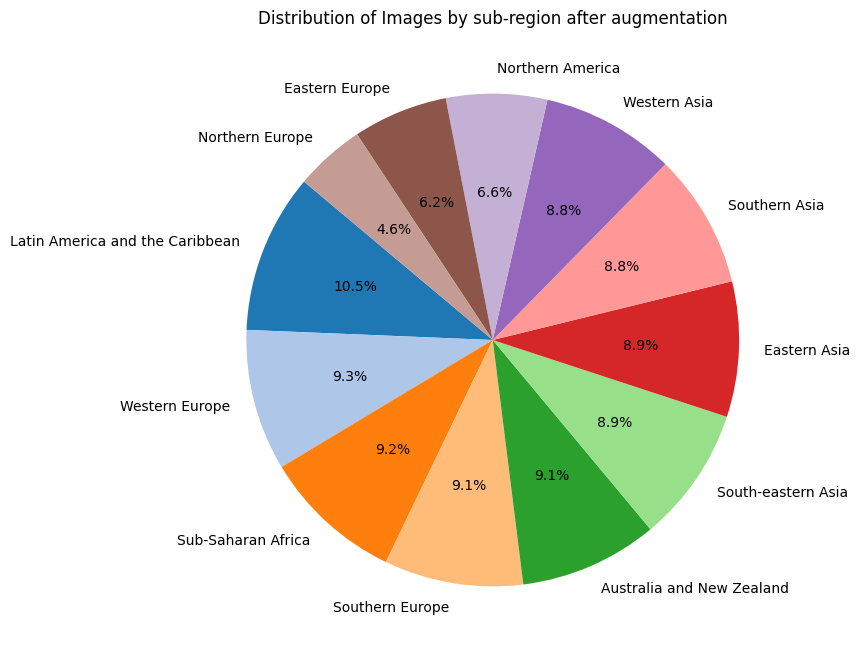

In [15]:
# Distribution of data based on sub-region
sub_region_distribution = data['sub-region'].value_counts()


plt.figure(figsize=(12, 8))
plt.pie(
    sub_region_distribution,
    labels=sub_region_distribution.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab20.colors
)
plt.title('Distribution of Images by sub-region after augmentation')
plt.show()

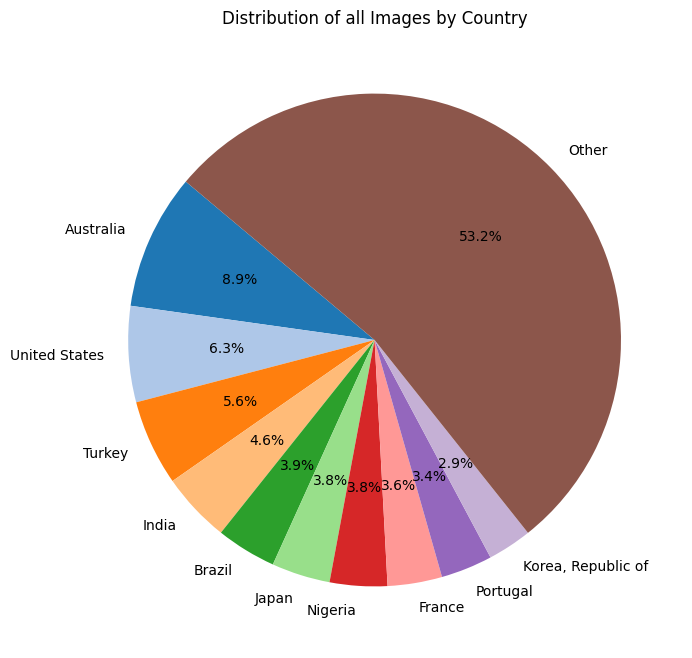

In [16]:
# Distribution of data based on country
country_distribution = data['country'].value_counts()

top_10_countries = country_distribution[:10]
others = country_distribution[10:].sum()
top_10_countries['Other'] = others

plt.figure(figsize=(12, 8))
plt.pie(
    top_10_countries,
    labels=top_10_countries.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab20.colors
)
plt.title('Distribution of all Images by Country')
plt.show()

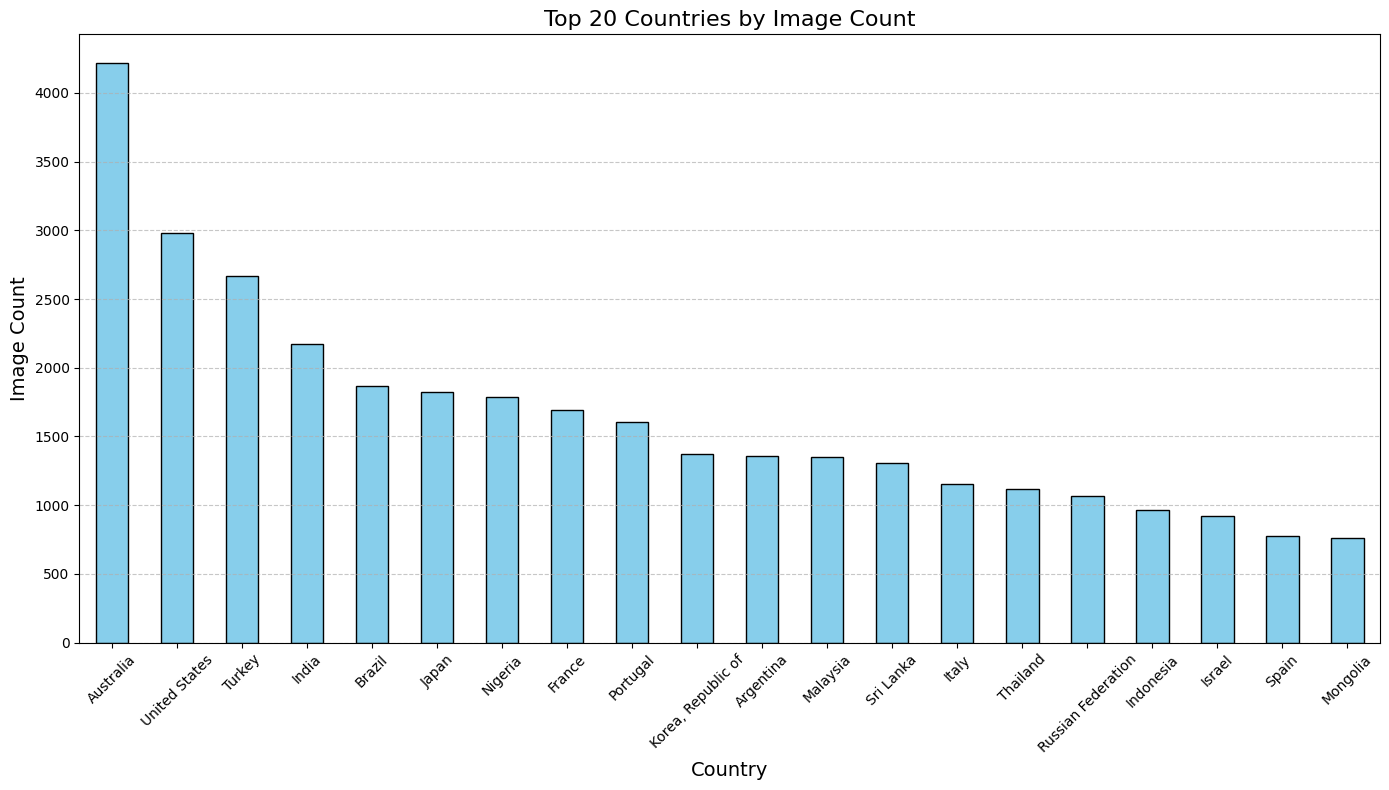

In [17]:
# Distribution of data based on country
country_distribution = data['country'].value_counts()

# Get the top 20 countries
top_20_countries = country_distribution[:20]

# Plot the bar chart
plt.figure(figsize=(14, 8))
top_20_countries.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Top 20 Countries by Image Count', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Image Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


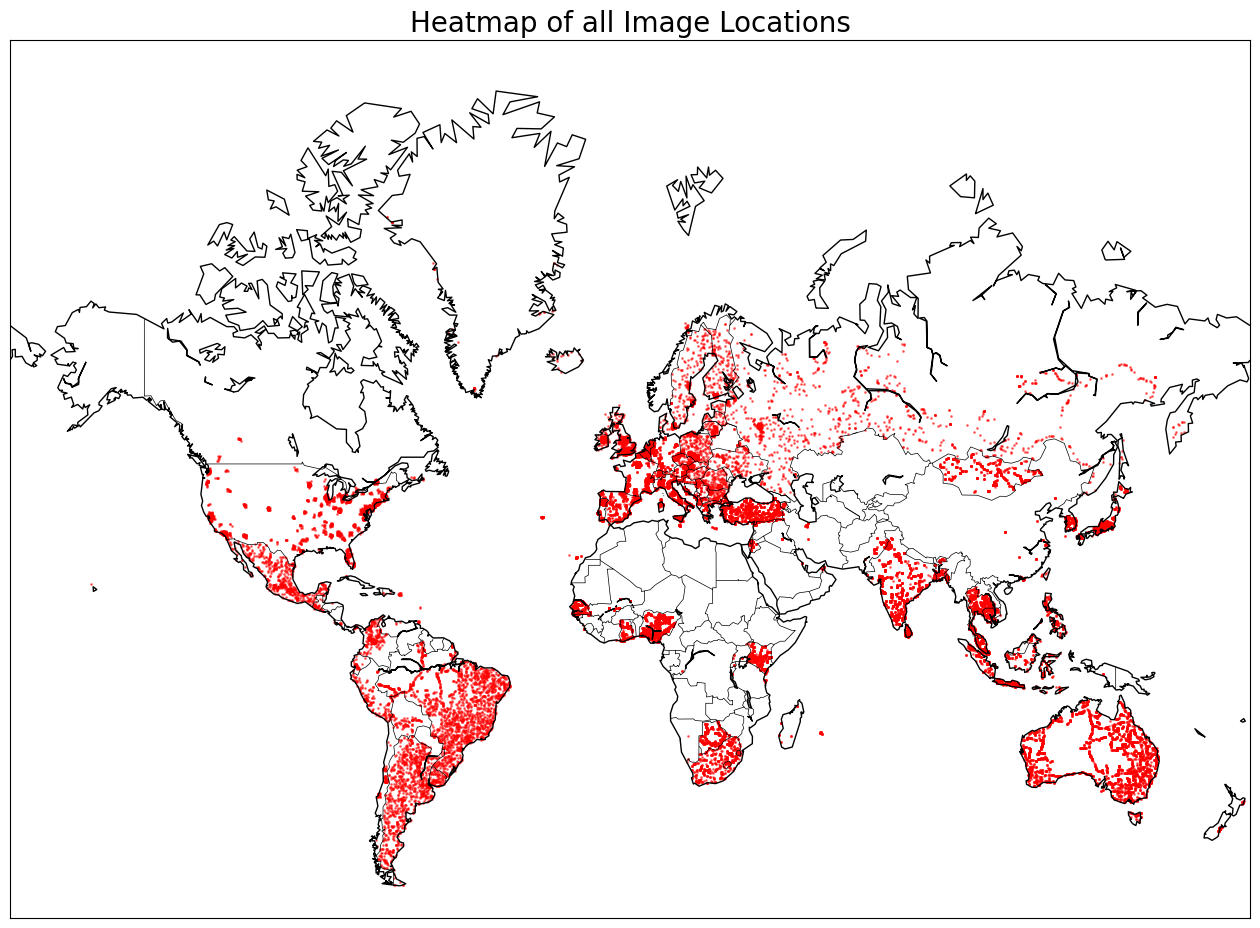

In [18]:
# Create a figure for the heatmap
plt.figure(figsize=(16, 12))

# Create a Basemap instance
m = Basemap(projection='merc', llcrnrlat=-60, urcrnrlat=85, llcrnrlon=-180, urcrnrlon=180, resolution='c')

# Draw coastlines and country borders
m.drawcoastlines()
m.drawcountries()

# Convert latitude and longitude to map coordinates
x, y = m(data['longitude'].values, data['latitude'].values)

# Plot the heatmap using a scatter plot
m.scatter(x, y, c='red', alpha=0.5, s=1, marker='o')

# Add title
plt.title('Heatmap of all Image Locations', fontsize=20)

# Show the heatmap
plt.show()


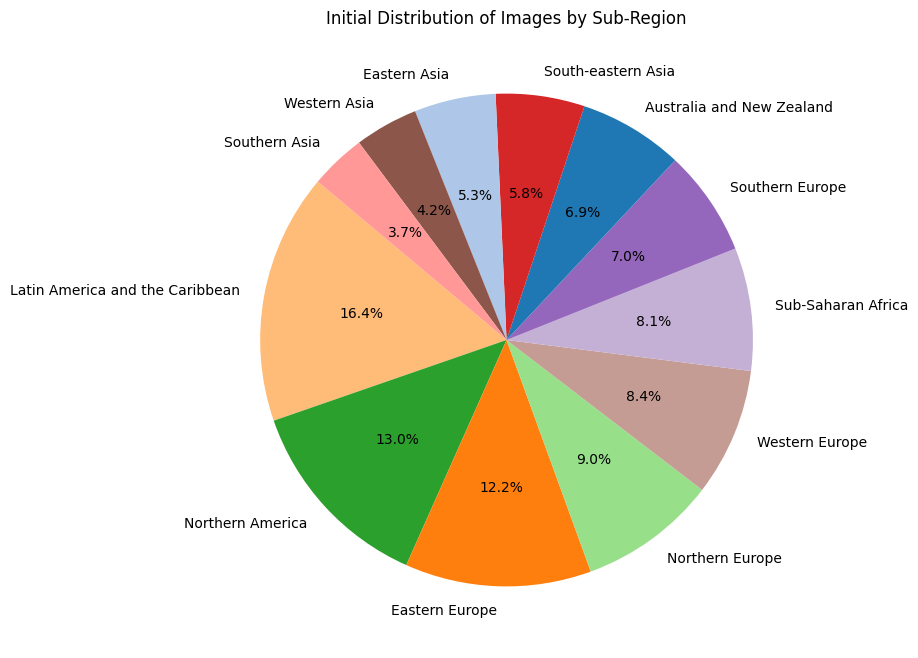

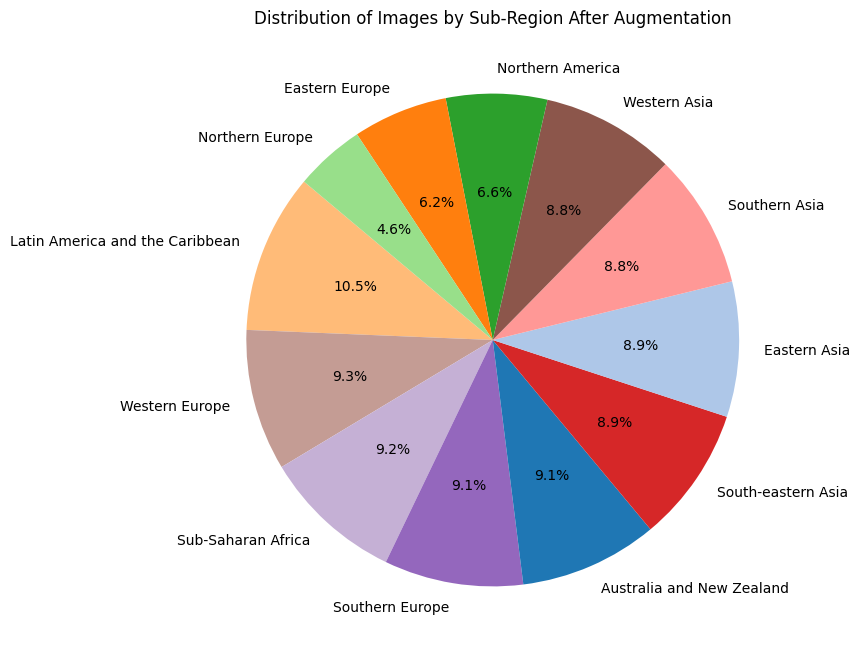

In [20]:
import matplotlib.pyplot as plt

# Convert all sub-region values to strings to avoid type errors
sub_regions = data['sub-region'].dropna().astype(str).unique()

# Use tab20 colormap for consistency
colors = plt.cm.tab20.colors

# Create a consistent color map
color_map = {sub_region: colors[i % len(colors)] for i, sub_region in enumerate(sorted(sub_regions))}

# Distribution of data based on sub-region (Initial Distribution)
sub_region_distribution_coords = initial_df['sub-region'].dropna().astype(str).value_counts()
plt.figure(figsize=(12, 8))
plt.pie(
    sub_region_distribution_coords,
    labels=sub_region_distribution_coords.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=[color_map[sub] for sub in sub_region_distribution_coords.index]
)
plt.title('Initial Distribution of Images by Sub-Region')
plt.show()

# Distribution of data based on sub-region (After Augmentation)
sub_region_distribution_data = data['sub-region'].dropna().astype(str).value_counts()
plt.figure(figsize=(12, 8))
plt.pie(
    sub_region_distribution_data,
    labels=sub_region_distribution_data.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=[color_map[sub] for sub in sub_region_distribution_data.index]
)
plt.title('Distribution of Images by Sub-Region After Augmentation')
plt.show()
